# Análisis Exploratorio de Datos (EDA) - Reservas Hoteleras

**Autores:** Alain Cascán y Daniel Herce  
**Asignatura:** Técnicas para la Ciencia de Datos  
**Dataset:** Hotel Booking Demand (Kaggle)

## 1. Problema Planteado

El objetivo de este estudio es realizar un **análisis exploratorio de datos (EDA)** sobre reservas hoteleras para comprender los patrones de comportamiento de los clientes y los factores que influyen en las cancelaciones.

### Preguntas de investigación:
1. ¿Qué factores están más relacionados con la cancelación de reservas?
2. ¿Cómo varían las reservas a lo largo del tiempo?
3. ¿La demanda se caracteriza por estancias cortas y reservas de última hora?

## 2. Datos Recogidos

El dataset **Hotel Bookings** de Kaggle contiene información sobre más de 119.000 reservas en dos tipos de hoteles: **City Hotel** y **Resort Hotel**.  
Cada fila representa una reserva con variables como fecha de llegada, duración de la estancia, número de huéspedes, tipo de cliente, país de origen, tarifa diaria promedio y si la reserva fue cancelada.

**Link:** [Hotel Booking Demand Dataset en Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

### Características del dataset:
- ``hotel``: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- ``is_canceled``: Value indicating if the booking was canceled (1) or not (0)
- ``lead_time``: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- ``arrival_date_year``: Year of arrival date
- ``arrival_date_month``: Month of arrival date
- ``arrival_date_week_number``: Week number of year for arrival date
- ``arrival_date_day_of_month``: Day of arrival date
- ``stays_in_weekend_nights``: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- ``stays_in_week_nights``: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- ``adults``: Number of adults
- ``children``: Number of children
- ``babies``: Number of babies
- ``meal``: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- ``country``: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- ``market_segment``: Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
- ``distribution_channel``: Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"
- ``is_repeated_guest``: Value indicating if the booking name was from a repeated guest (1) or not (0)
- ``previous_cancellations``: Number of previous bookings that were cancelled by the customer prior to the current booking
- ``previous_bookings_not_canceled``: Number of previous bookings not cancelled by the customer prior to the current booking
- ``reserved_room_type``: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- ``assigned_room_type``: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- ``booking_changes``: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- ``deposit_type``: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- ``agent``: ID of the travel agency that made the booking
- ``company``: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- ``days_in_waiting_list``: Number of days the booking was in the waiting list before it was confirmed to the customer
- ``customer_type``: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- ``adr``: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- ``required_car_parking_spaces``: Number of car parking spaces required by the customer
- ``total_of_special_requests``: Number of special requests made by the customer (e.g. twin bed or high floor)
- ``reservation_status``: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- ``reservation_status_date``: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Importación de librerías y creación del DataFrame

Primero se importan las librerías necesarias y se carga el dataset en un DataFrame utilizando **pandas**.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
df = pd.read_csv('hotel_bookings.csv',delimiter=',')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [60]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 3. Tratamiento de los Datos

Una vez cargado el dataset, se realiza el **preprocesamiento** para preparar la información antes del análisis.  
Este paso incluye la revisión de valores nulos, el tratamiento de variables categóricas, la eliminación de columnas irrelevantes y el análisis de valores atípicos.

### 3.1. Detección y tratamiento de valores nulos

Se define una función para calcular el número de valores nulos por columna y su porcentaje respecto al total de filas.  
Esto permite identificar rápidamente las variables que requieren limpieza o imputación.

In [61]:
def check_nulls(dataframe):
    nulls = dataframe.isnull().sum()
    pct_null = (nulls / dataframe.shape[0]) * 100
    missing_summary = pd.DataFrame({
        "n_nulls": nulls,
        "percent_null": pct_null
    })
    missing_summary = missing_summary[missing_summary["n_nulls"] > 0]
    return missing_summary[missing_summary > 0]

check_nulls(df)


,n_nulls,percent_null
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


Se identifican **cuatro columnas con valores nulos**:  
- `children`  
- `country`  
- `agent`  
- `company`  

La columna **`company`** presenta aproximadamente un **94% de valores nulos**, lo que la hace no informativa. Dado su alto porcentaje de ausencia, esta variable introduce ruido y debe eliminarse del conjunto de datos.

La columna **`agent`** contiene un **86,32% de valores no nulos**, pero su información no es relevante para el objetivo del análisis, que se centra en el comportamiento del cliente. Por tanto, se descarta también esta variable.

Las columnas **`children`** y **`country`** son relevantes y presentan un porcentaje bajo de valores nulos.  

- Para **`children`**, se sustituirán los valores nulos con **0**, ya que este es el valor más frecuente y su sustitución no introduce sesgo significativo.  
- Para **`country`**, se eliminarán las filas con valores nulos. No se sustituirá por un valor arbitrario (por ejemplo, *unknown*) debido a que:  
  1. No existe una base lógica para asignar un país faltante.  
  2. La sustitución no aporta información útil.  
  3. Las filas afectadas representan menos del **1%** del total, por lo que su eliminación tiene un impacto mínimo en el análisis.


In [62]:
df.drop(columns=['company', 'agent'], inplace=True) # Eliminar columnas con muchos valores nulos, ya que no aportan información relevante
df.fillna({'children': 0}, inplace=True) # Rellenar valores nulos en la columna 'children' con 0
df.dropna(inplace=True) # Eliminar filas con valores nulos en otras columnas

In [63]:
check_nulls(df) # Verificar que no quedan valores nulos

,n_nulls,percent_null


### 3.2. Análisis exploratorio de variables

En esta sección se representan gráficamente las principales variables del conjunto de datos para analizar su distribución y comportamiento.

In [64]:
def find_categorical_and_numerical_columns(df): #Clasificamos las columnas en categóricas y numéricas
    categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical = df.select_dtypes(include=['number']).columns.tolist()
    return categorical, numerical

categorical_cols, numerical_cols = find_categorical_and_numerical_columns(df) 
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


#### 3.2.1. Variables numéricas

A continuación se visualizan los boxplots de todas las variables numéricas para identificar la distribución de los datos y detectar posibles valores atípicos.

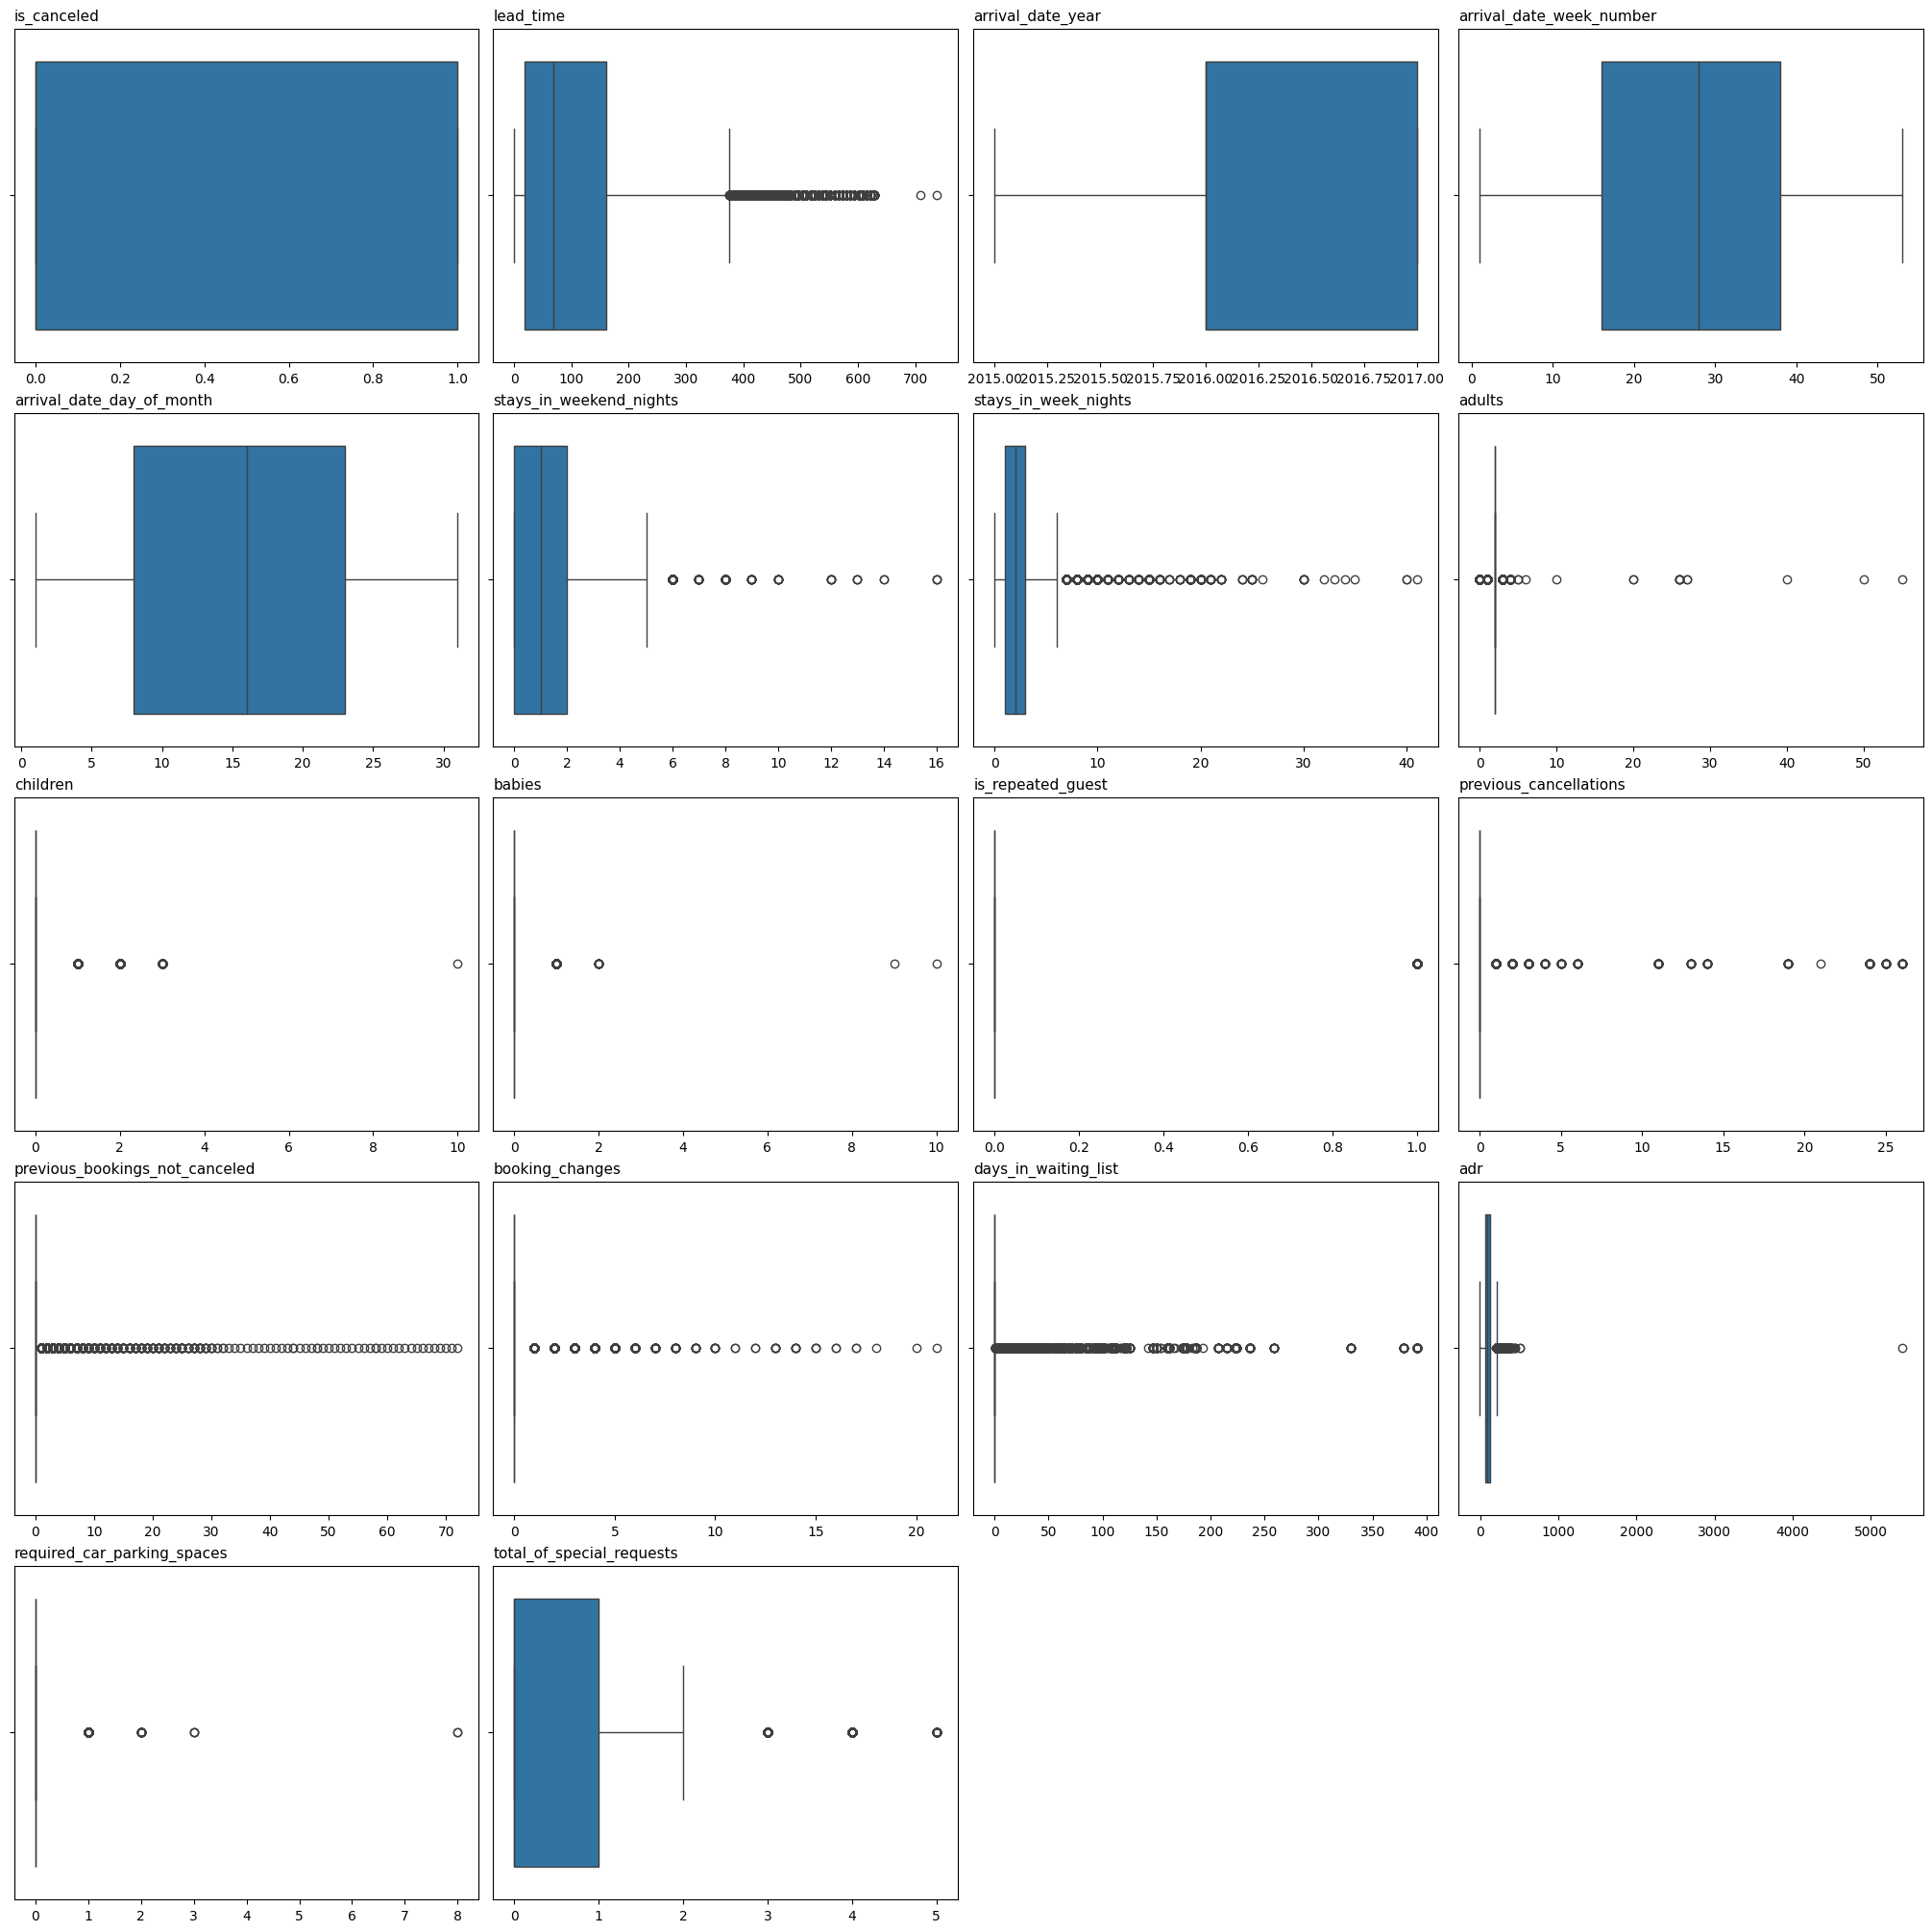

In [65]:
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=df[col], orient='h', ax=ax, showfliers=True)  # horizontal y sin puntos de outlier
    ax.set_title(col, loc='left', fontsize=11)
    ax.set_xlabel("")  # más limpio

# eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [66]:
df[numerical_cols].describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### 3.2.2. Análisis de valores atípicos

Del análisis de boxplots y estadísticas descriptivas, se identifican las siguientes variables con valores atípicos significativos:

In [67]:
# Variables identificadas con valores atípicos
atipical_cols = ['lead_time', 'adults', 'children', 'babies', 'previous_cancellations', 
                 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 
                 'required_car_parking_spaces', 'total_of_special_requests']

print(f"Variables con valores atípicos: {len(atipical_cols)}")
print("\nEstadísticas de las variables con valores atípicos:")
df[atipical_cols].describe()

Variables con valores atípicos: 10

Estadísticas de las variables con valores atípicos:


,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,104.308027,1.858404,0.104203,0.007948,0.087139,0.131629,2.330676,102.000808,0.061883,0.571706
std,106.903127,0.578576,0.399166,0.097379,0.845855,1.484647,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000,5400.000000,8.000000,5.000000


In [68]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

### 3.3. Matriz de correlación

Analizamos las correlaciones entre las variables numéricas para identificar relaciones entre ellas.

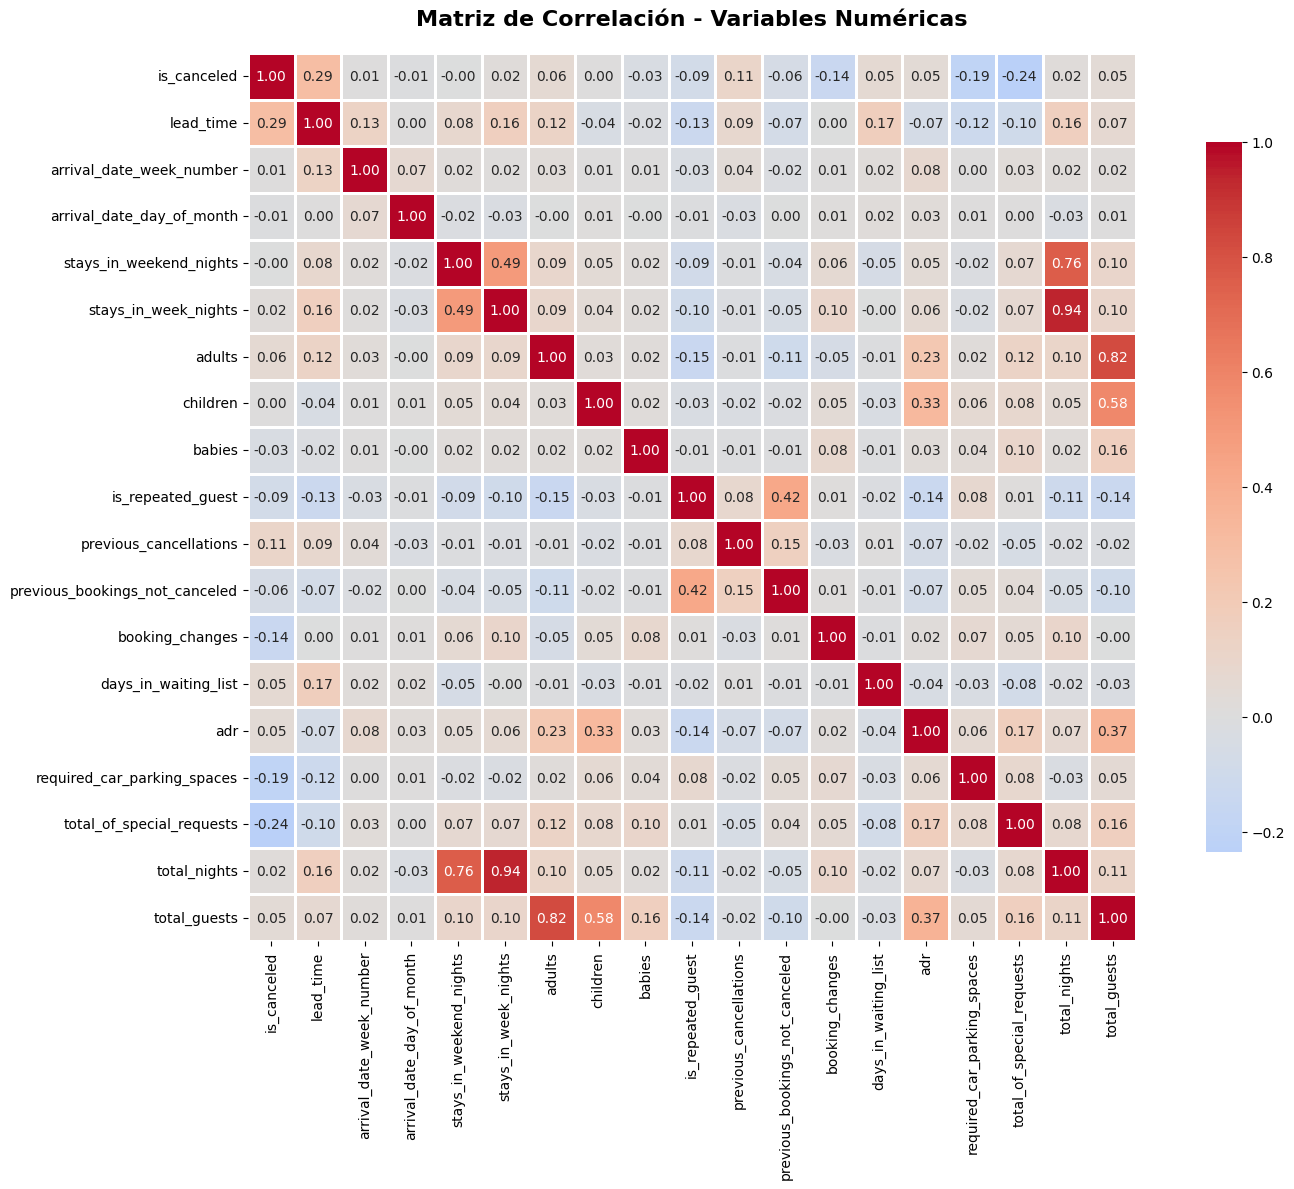

In [69]:
plt.figure(figsize=(16, 12))

# Seleccionar solo variables numéricas relevantes
numeric_cols_for_corr = ['is_canceled', 'lead_time', 'arrival_date_week_number', 
                         'arrival_date_day_of_month', 'stays_in_weekend_nights', 
                         'stays_in_week_nights', 'adults', 'children', 'babies',
                         'is_repeated_guest', 'previous_cancellations', 
                         'previous_bookings_not_canceled', 'booking_changes',
                         'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                         'total_of_special_requests', 'total_nights', 'total_guests']

correlation_matrix = df[numeric_cols_for_corr].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


### 3.4. Análisis de cancelaciones

Las cancelaciones son un aspecto crítico en el negocio hotelero. Analizamos los patrones de cancelación.

In [70]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104167
Non Refund     14573
Refundable       162
Name: count, dtype: int64

In [71]:
categories_to_analyze = ['hotel', 'market_segment', 'distribution_channel', 
                         'customer_type', 'deposit_type']

for cat in categories_to_analyze:
    print(f"\n{cat.upper()}:")
    cancel_rate_by_cat = df.groupby(cat)['is_canceled'].agg(['sum', 'count'])
    cancel_rate_by_cat['cancel_rate'] = (cancel_rate_by_cat['sum'] / cancel_rate_by_cat['count']) * 100
    cancel_rate_by_cat = cancel_rate_by_cat.sort_values('cancel_rate', ascending=False)
    
    for idx, row in cancel_rate_by_cat.iterrows():
        print(f"  {idx}: {row['cancel_rate']:.2f}% ({int(row['sum'])}/{int(row['count'])})")


HOTEL:
  City Hotel: 41.71% (33080/79306)
  Resort Hotel: 27.98% (11077/39596)

MARKET_SEGMENT:
  Undefined: 100.00% (2/2)
  Groups: 61.08% (12097/19806)
  Online TA: 36.77% (20739/56403)
  Offline TA/TO: 34.26% (8278/24160)
  Aviation: 21.94% (52/237)
  Corporate: 19.14% (978/5111)
  Direct: 15.43% (1921/12449)
  Complementary: 12.26% (90/734)

DISTRIBUTION_CHANNEL:
  Undefined: 80.00% (4/5)
  TA/TO: 41.05% (40119/97730)
  Corporate: 22.40% (1454/6491)
  GDS: 19.17% (37/193)
  Direct: 17.56% (2543/14483)

CUSTOMER_TYPE:
  Transient: 40.89% (36460/89174)
  Contract: 30.96% (1262/4076)
  Transient-Party: 25.42% (6377/25082)
  Group: 10.18% (58/570)

DEPOSIT_TYPE:
  Non Refund: 99.36% (14480/14573)
  No Deposit: 28.46% (29641/104167)
  Refundable: 22.22% (36/162)


Tasa de cancelación general: 37.14%
Reservas canceladas: 44157
Reservas confirmadas: 74745


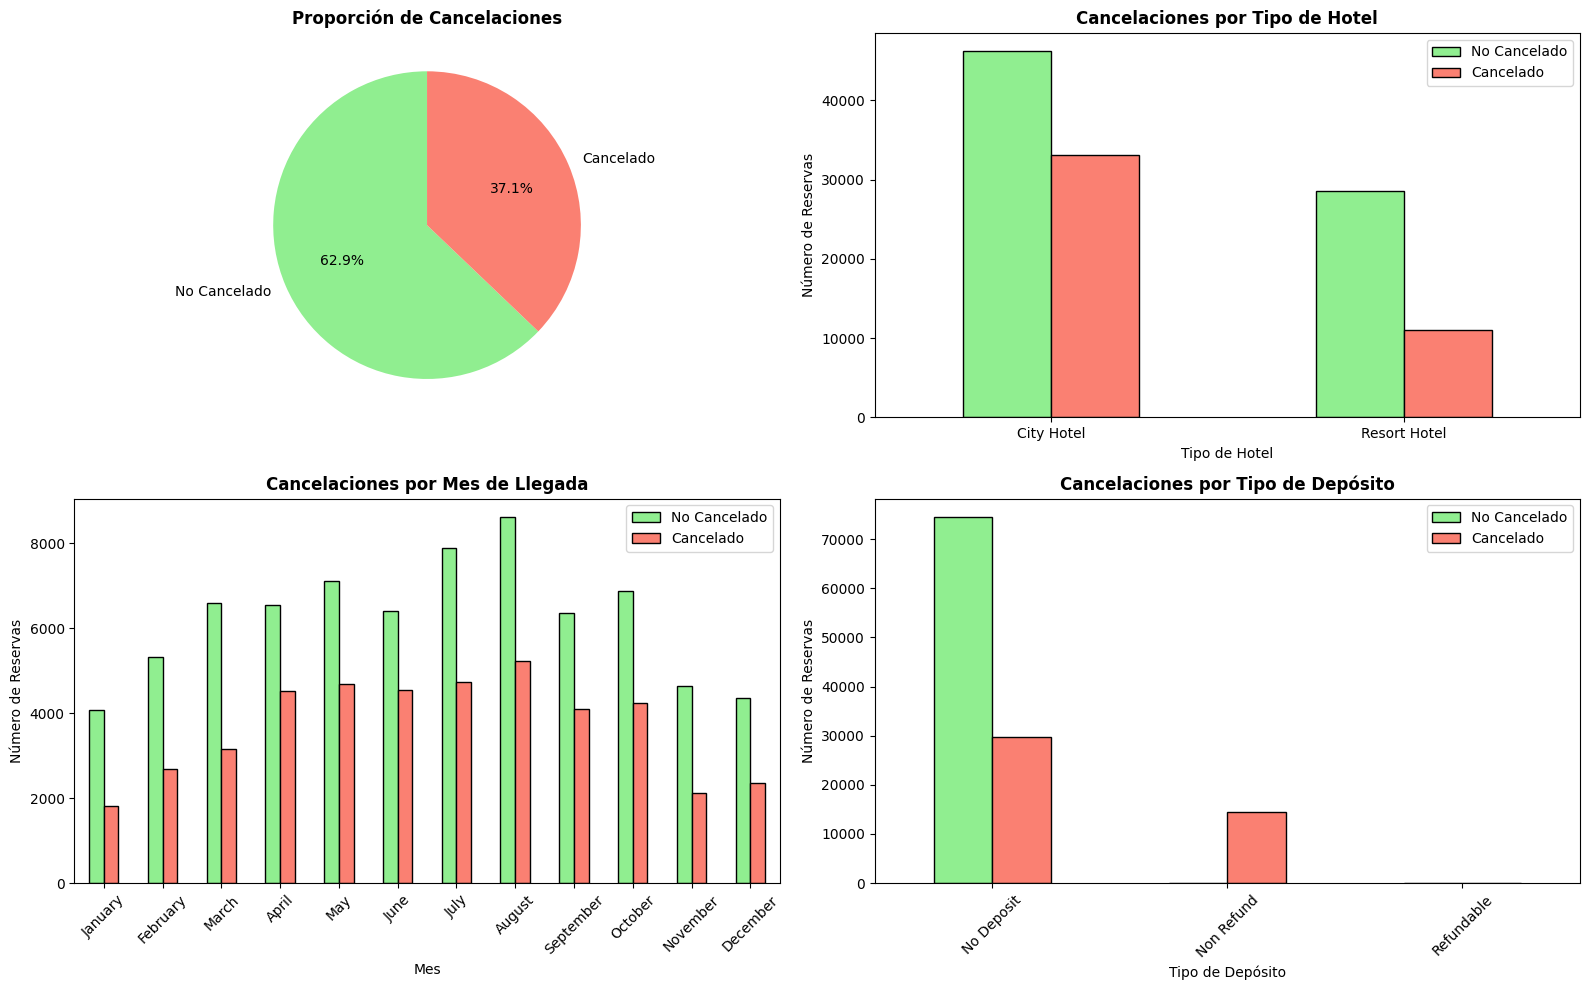

In [72]:
cancel_rate = (df['is_canceled'].sum() / len(df)) * 100
print(f"Tasa de cancelación general: {cancel_rate:.2f}%")
print(f"Reservas canceladas: {df['is_canceled'].sum()}")
print(f"Reservas confirmadas: {len(df) - df['is_canceled'].sum()}")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

cancel_counts = df['is_canceled'].value_counts()
colors = ['lightgreen', 'salmon']
axes[0, 0].pie(cancel_counts, labels=['No Cancelado', 'Cancelado'], autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Proporción de Cancelaciones', fontweight='bold')

cancel_by_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()
cancel_by_hotel.plot(kind='bar', ax=axes[0, 1], color=colors, edgecolor='black')
axes[0, 1].set_title('Cancelaciones por Tipo de Hotel', fontweight='bold')
axes[0, 1].set_xlabel('Tipo de Hotel')
axes[0, 1].set_ylabel('Número de Reservas')
axes[0, 1].legend(['No Cancelado', 'Cancelado'])
axes[0, 1].tick_params(axis='x', rotation=0)

cancel_by_month = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month = cancel_by_month.reindex(month_order)
cancel_by_month.plot(kind='bar', ax=axes[1, 0], color=colors, edgecolor='black')
axes[1, 0].set_title('Cancelaciones por Mes de Llegada', fontweight='bold')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Número de Reservas')
axes[1, 0].legend(['No Cancelado', 'Cancelado'])
axes[1, 0].tick_params(axis='x', rotation=45)

cancel_by_deposit = df.groupby(['deposit_type', 'is_canceled']).size().unstack()
cancel_by_deposit.plot(kind='bar', ax=axes[1, 1], color=colors, edgecolor='black')
axes[1, 1].set_title('Cancelaciones por Tipo de Depósito', fontweight='bold')
axes[1, 1].set_xlabel('Tipo de Depósito')
axes[1, 1].set_ylabel('Número de Reservas')
axes[1, 1].legend(['No Cancelado', 'Cancelado'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Hemos analizado primero las variables comerciales y de canal. La que más diferencia reservas con y sin cancelación es deposit_type. Las no reembolsables se asocian con más cancelaciones, mientras que “no depósito” y “reembolsable” muestran tasas por debajo de la media. Para el análisis exploratorio, concluimos que la política de depósito segmenta claramente el riesgo.

En market_segment y distribution_channel se observa un patrón consistente: los segmentos Groups y TA/TO presentan más cancelaciones, mientras que Direct y Corporate presentan menos. En customer_type, el comportamiento es coherente: Transient cancela más que Contract o Group. No se interpretan estas variables como causas, solo se describe su coexistencia con distintos niveles de cancelación.

Por tipo de hotel, City muestra más cancelaciones que Resort. De momento lo tomamos como una diferencia descriptiva del conjunto; podría reflejar mezcla de segmentos y canales, lo que requeriría un ajuste posterior.

En la dimensión temporal, algunos meses presentan tasas de cancelación más altas que otros. No se identifica una causa única, pero se deja constancia de la estacionalidad como factor a seguir.

Entre las variables numéricas, la relación más clara aparece con lead_time: a mayor antelación, mayor probabilidad de cancelación. También se observa que más días en lista de espera se asocian con más cancelaciones, mientras que más solicitudes especiales o plazas de aparcamiento se asocian con menos. La relación con adr es débil en análisis univariante.

### 3.5. Análisis temporal

Se analizan las tendencias temporales de las reservas.

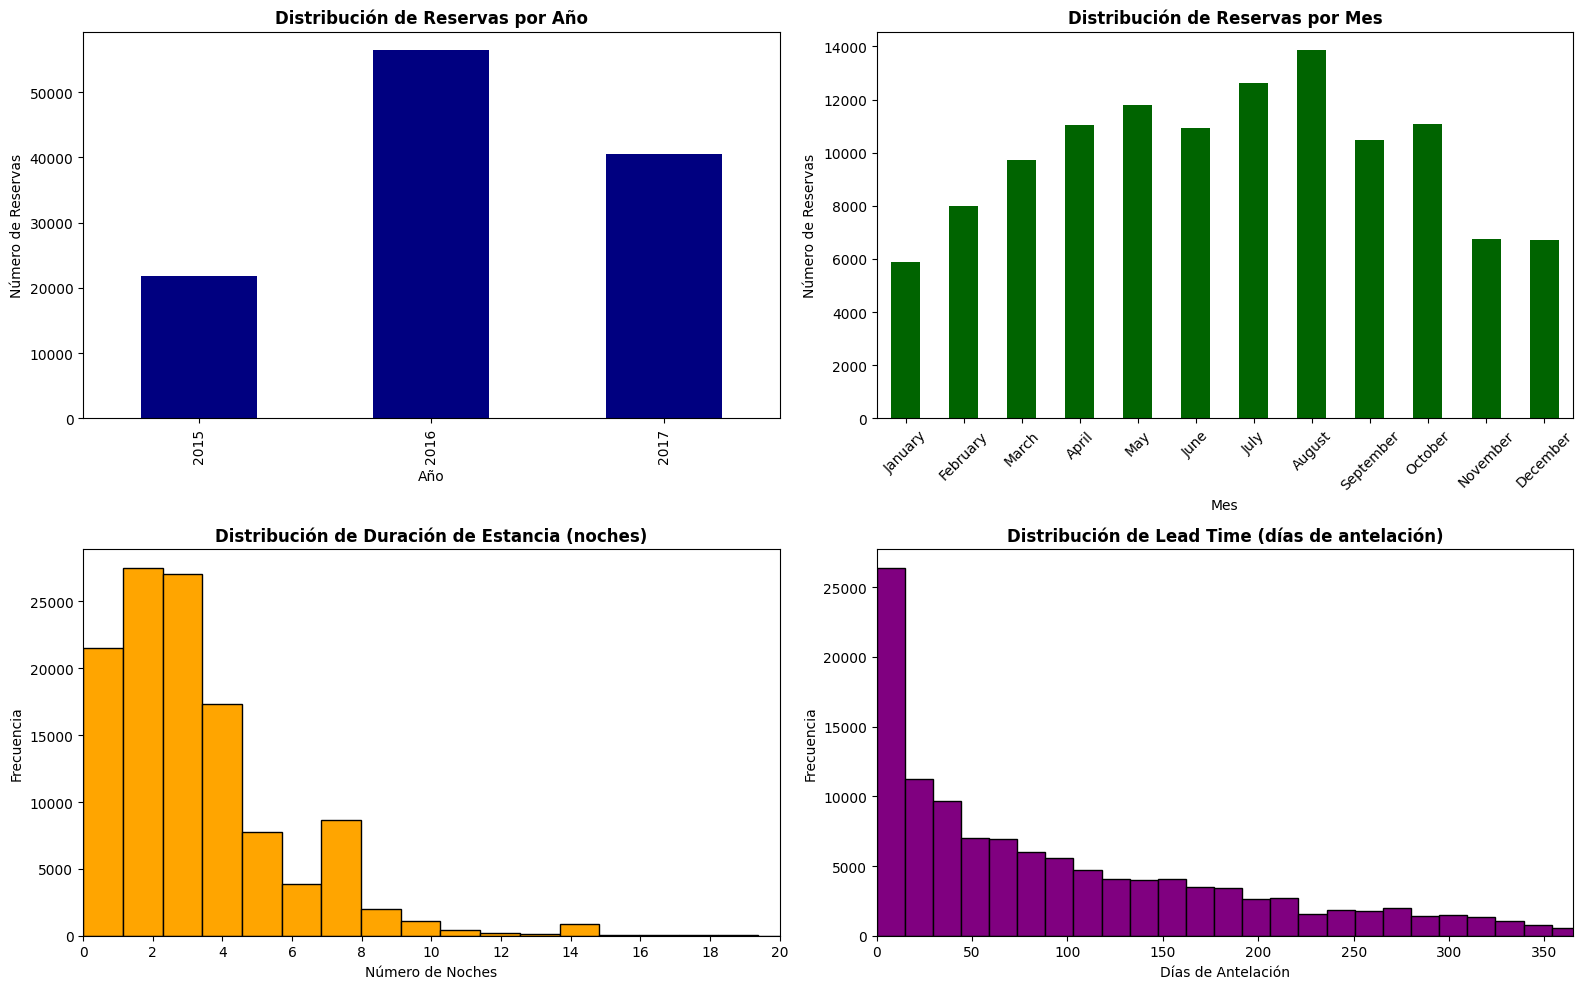

Duración media de estancia: 3.43 noches
Lead time medio: 104.31 días


In [81]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['arrival_date_year'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='navy')
axes[0, 0].set_title('Distribución de Reservas por Año', fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de Reservas')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['arrival_date_month'].value_counts().reindex(month_order)
month_counts.plot(kind='bar', ax=axes[0, 1], color='darkgreen')
axes[0, 1].set_title('Distribución de Reservas por Mes', fontweight='bold')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Número de Reservas')
axes[0, 1].tick_params(axis='x', rotation=45)

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].plot(kind='hist', bins=50, ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Distribución de Duración de Estancia (noches)', fontweight='bold')
axes[1, 0].set_xlabel('Número de Noches')
axes[1, 0].set_xticks(range(0, 21, 2))
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_xlim(0, 20)  # Limitar a 20 noches para mejor visualización

df['lead_time'].plot(kind='hist', bins=50, ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('Distribución de Lead Time (días de antelación)', fontweight='bold')
axes[1, 1].set_xlabel('Días de Antelación')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xlim(0, 365)  # Limitar a 1 año para mejor visualización

plt.tight_layout()
plt.show()

print(f"Duración media de estancia: {df['total_nights'].mean():.2f} noches")
print(f"Lead time medio: {df['lead_time'].mean():.2f} días")

El volumen anual no es estable. En 2016 se concentra el mayor número de reservas; en 2017 se observa un descenso respecto a 2016, aunque se mantiene por encima de 2015. El patrón muestra un crecimiento pronunciado de 2015 a 2016 y una corrección en 2017, lo que sugiere un ciclo de expansión seguido de normalización.

Las reservas aumentan casi de forma continua desde enero hasta alcanzar un máximo en agosto. A partir de ese punto caen con rapidez en septiembre y siguen descendiendo hasta diciembre. Enero es el mes con menor volumen. El comportamiento es consistente con una temporada alta en verano y baja en invierno.

Junio y septiembre actúan como zonas intermedias de la temporada. Estos meses pueden aprovecharse para ajustar capacidad y precios de forma gradual, con incremento progresivo en primavera y reducción en otoño.

La mayoría de las reservas corresponden a estancias cortas de entre una y tres noches. Esto implica que los picos mensuales reflejan principalmente una alta rotación de huéspedes, más que ocupaciones prolongadas. En términos operativos, la carga se concentra en la gestión de entradas y salidas, no en estancias largas.

La variable lead time muestra una distribución muy asimétrica: predominan las reservas con poca antelación y una cola larga que llega hasta aproximadamente un año. Esto indica que una parte significativa del volumen mensual se confirma cerca de la fecha de llegada, aunque en todos los meses existe también una fracción de demanda planificada con antelación considerable.

### 3.6. Variables categóricas

Ahora analizamos la distribución de las variables categóricas del dataset.

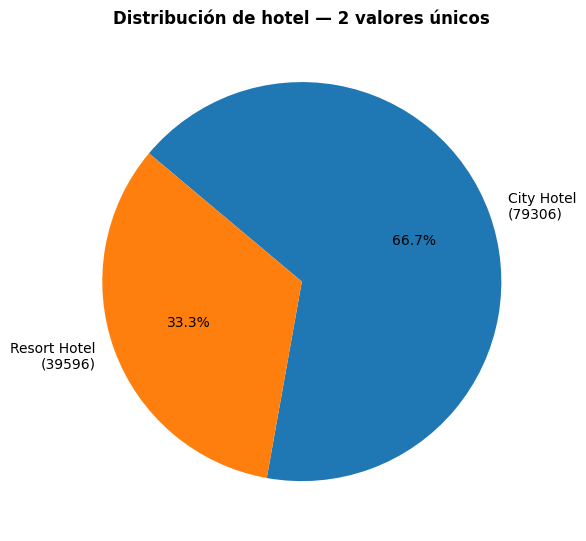

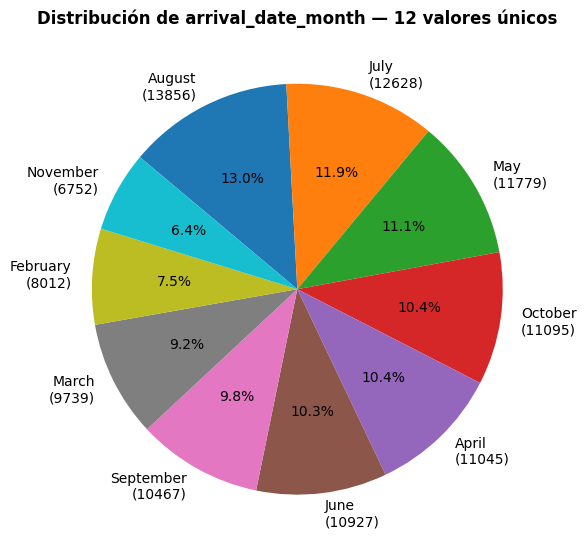

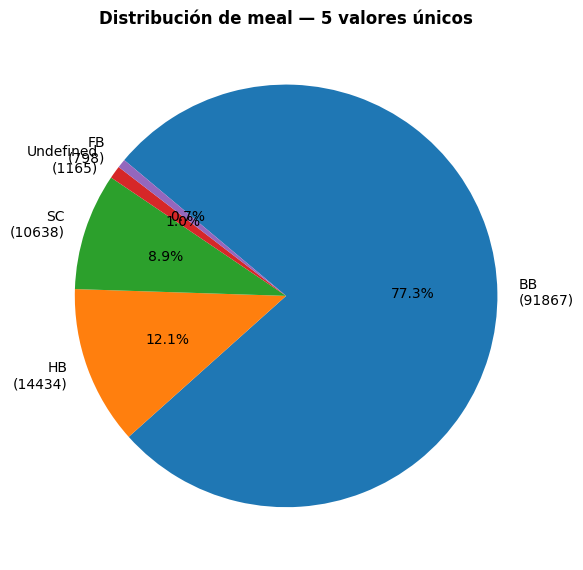

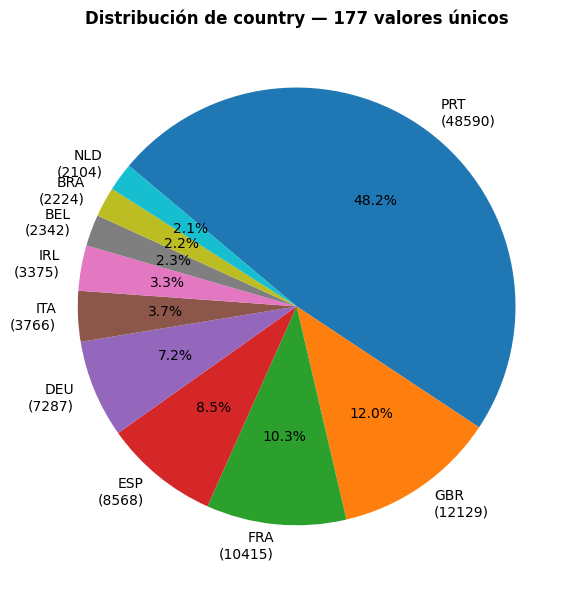

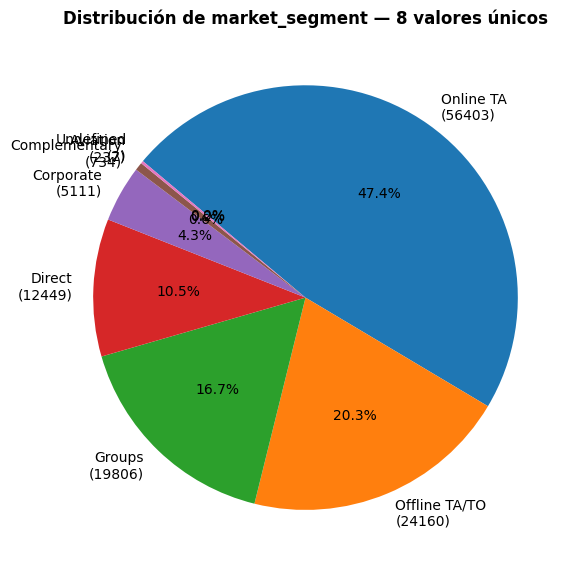

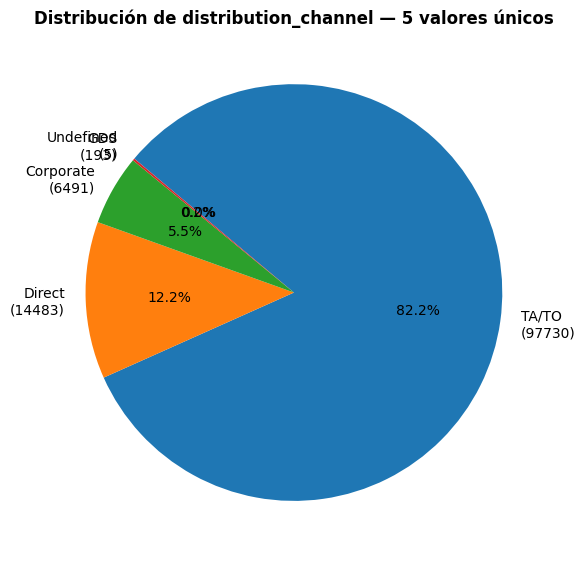

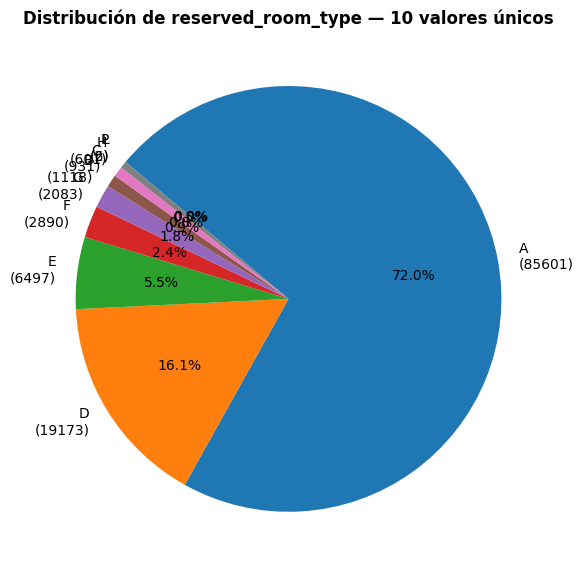

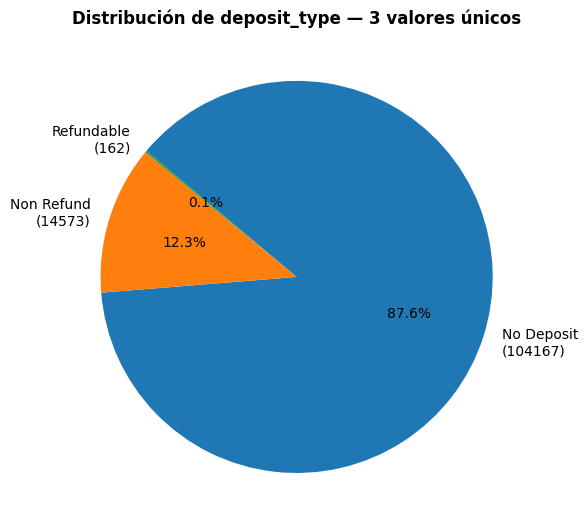

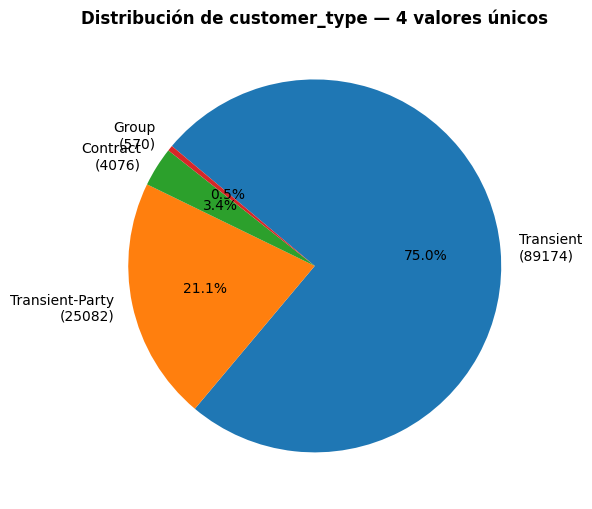

In [82]:

categorical_to_plot = ['hotel', 'arrival_date_month', 'meal', 'country', 
                       'market_segment', 'distribution_channel', 'reserved_room_type', 
                       'deposit_type', 'customer_type']

for col in categorical_to_plot:
    value_counts = df[col].value_counts()
    top10 = value_counts.head(10)
    total = len(df)
    unique_vals = df[col].nunique()

    labels = [f"{idx}\n({count})" for idx, count in zip(top10.index, top10.values)]

    plt.figure(figsize=(6, 6))
    plt.pie(
        top10 / total * 100,
        labels=labels,
        autopct='%1.1f%%',                    
        startangle=140,
        counterclock=False
    )
    plt.title(f"Distribución de {col} — {unique_vals} valores únicos", fontweight='bold')
    plt.tight_layout()
    plt.show()

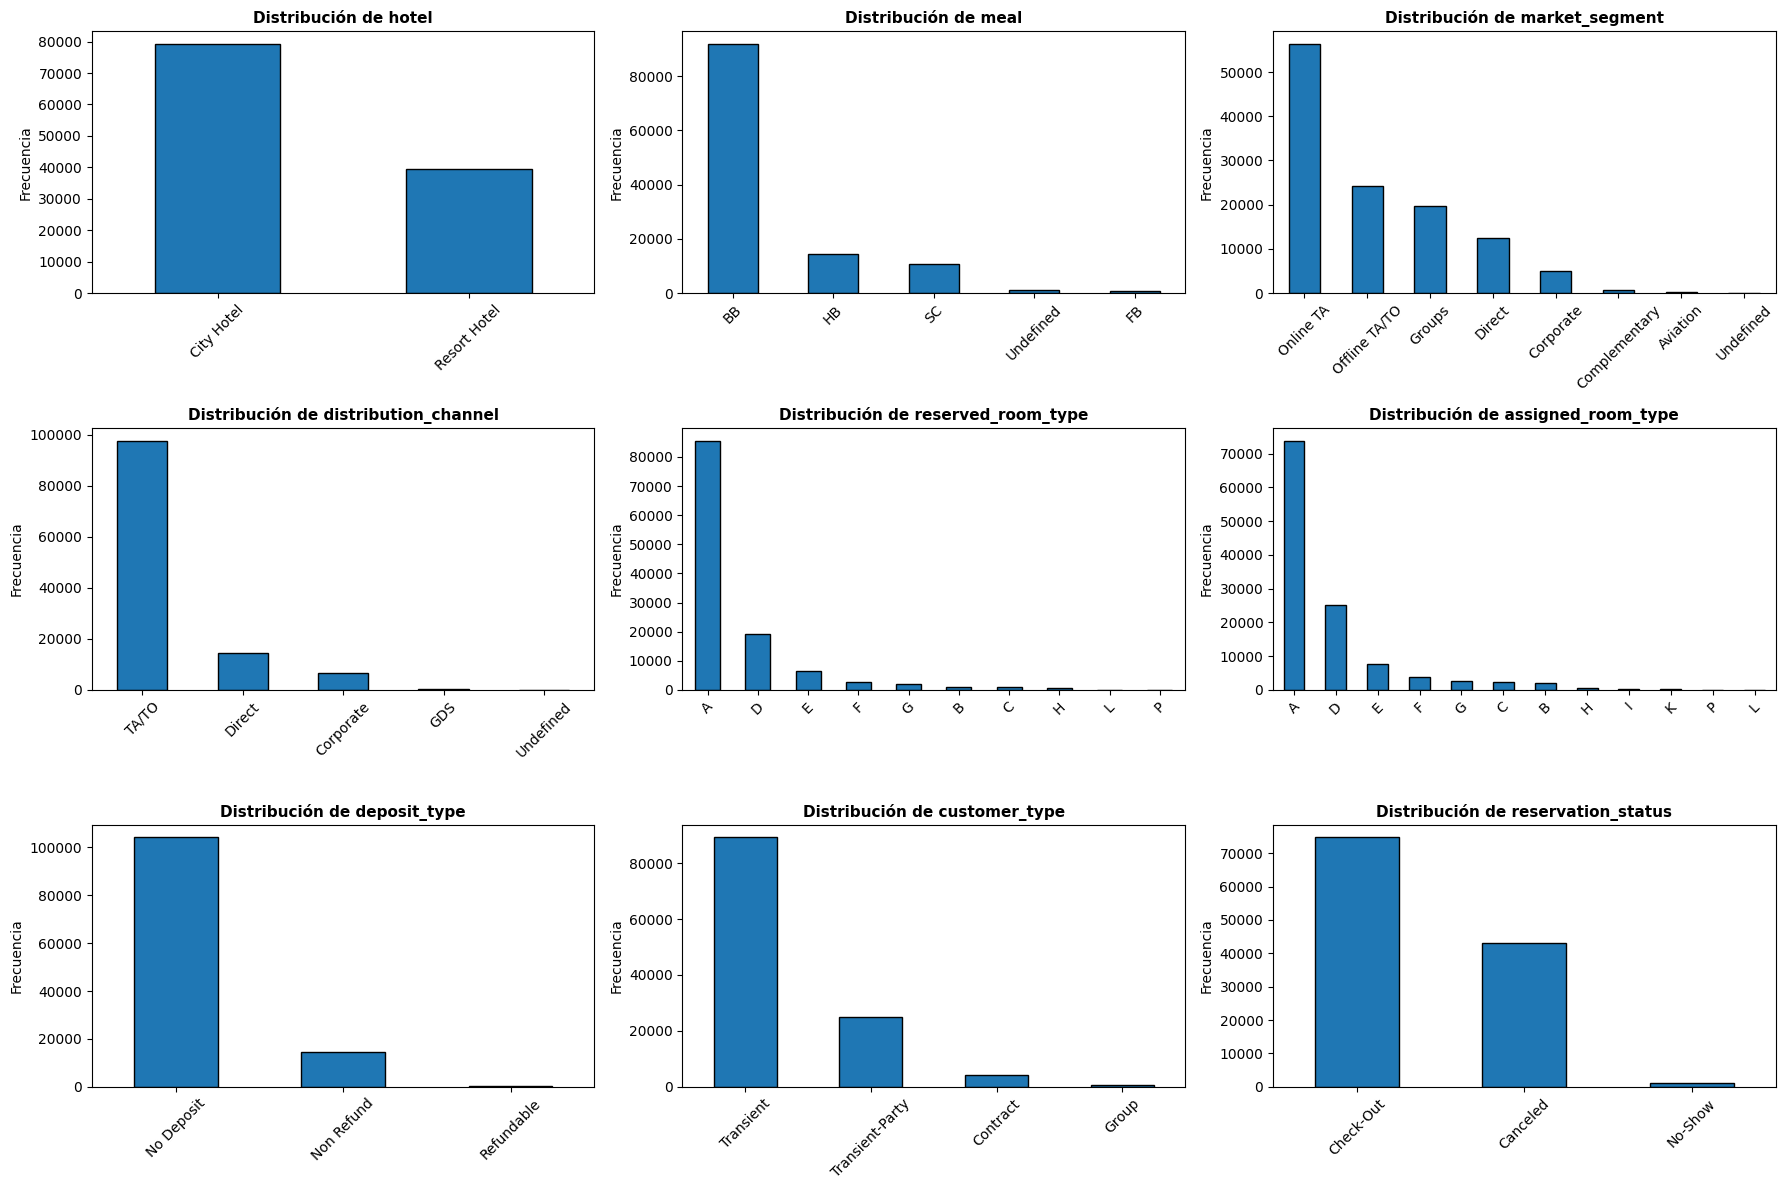

In [83]:
# Visualización de variables categóricas principales
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

categorical_to_plot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                       'customer_type', 'reservation_status']

for i, col in enumerate(categorical_to_plot):
    if i < len(axes):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.7. Análisis de países de origen

Vamos a ver de donde vienen los huespedes que reservan en los hoteles.

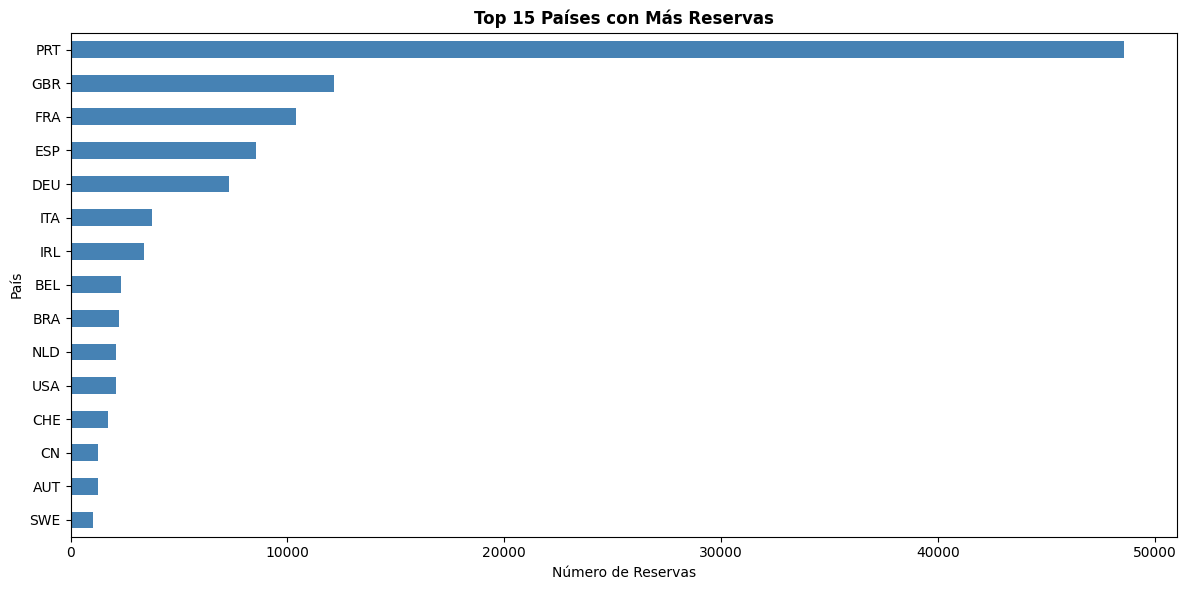

In [76]:
top_countries = df['country'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh', color='steelblue')
plt.title('Top 15 Países con Más Reservas', fontweight='bold')
plt.xlabel('Número de Reservas')
plt.ylabel('País')
plt.gca().invert_yaxis()  # para que el mayor esté arriba
plt.tight_layout()
plt.show()

## 4. Diseño del modelo de datos

Para el análisis hemos estructurado los datos en diferentes dimensiones que nos permiten estudiar el comportamiento de las reservas desde distintos ángulos:

**Dimensión temporal:**
- Variables originales: `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`
- Variables creadas: `total_nights` (suma de noches de fin de semana y entre semana)

**Dimensión del cliente:**
- Variables: `country`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`
- Variables creadas: `total_guests` (suma de adultos, niños y bebés)

**Dimensión comercial:**
- Variables: `market_segment`, `distribution_channel`, `customer_type`, `deposit_type`
- Estas variables nos permiten entender los canales de venta y perfiles de cliente

**Dimensión de la reserva:**
- Variables: `lead_time`, `booking_changes`, `days_in_waiting_list`, `total_of_special_requests`
- Variable objetivo: `is_canceled`

**Dimensión del producto:**
- Variables: `hotel`, `reserved_room_type`, `assigned_room_type`, `meal`, `adr`

Este modelo nos ha permitido analizar las cancelaciones desde multiples perspectivas y entender que factores estan mas relacionados con ellas.

## 5. Resultados y Visualización

En esta sección presentamos algunos resultados clave del análisis exploratorio.

### 5.1. Comparativa entre City Hotel y Resort Hotel

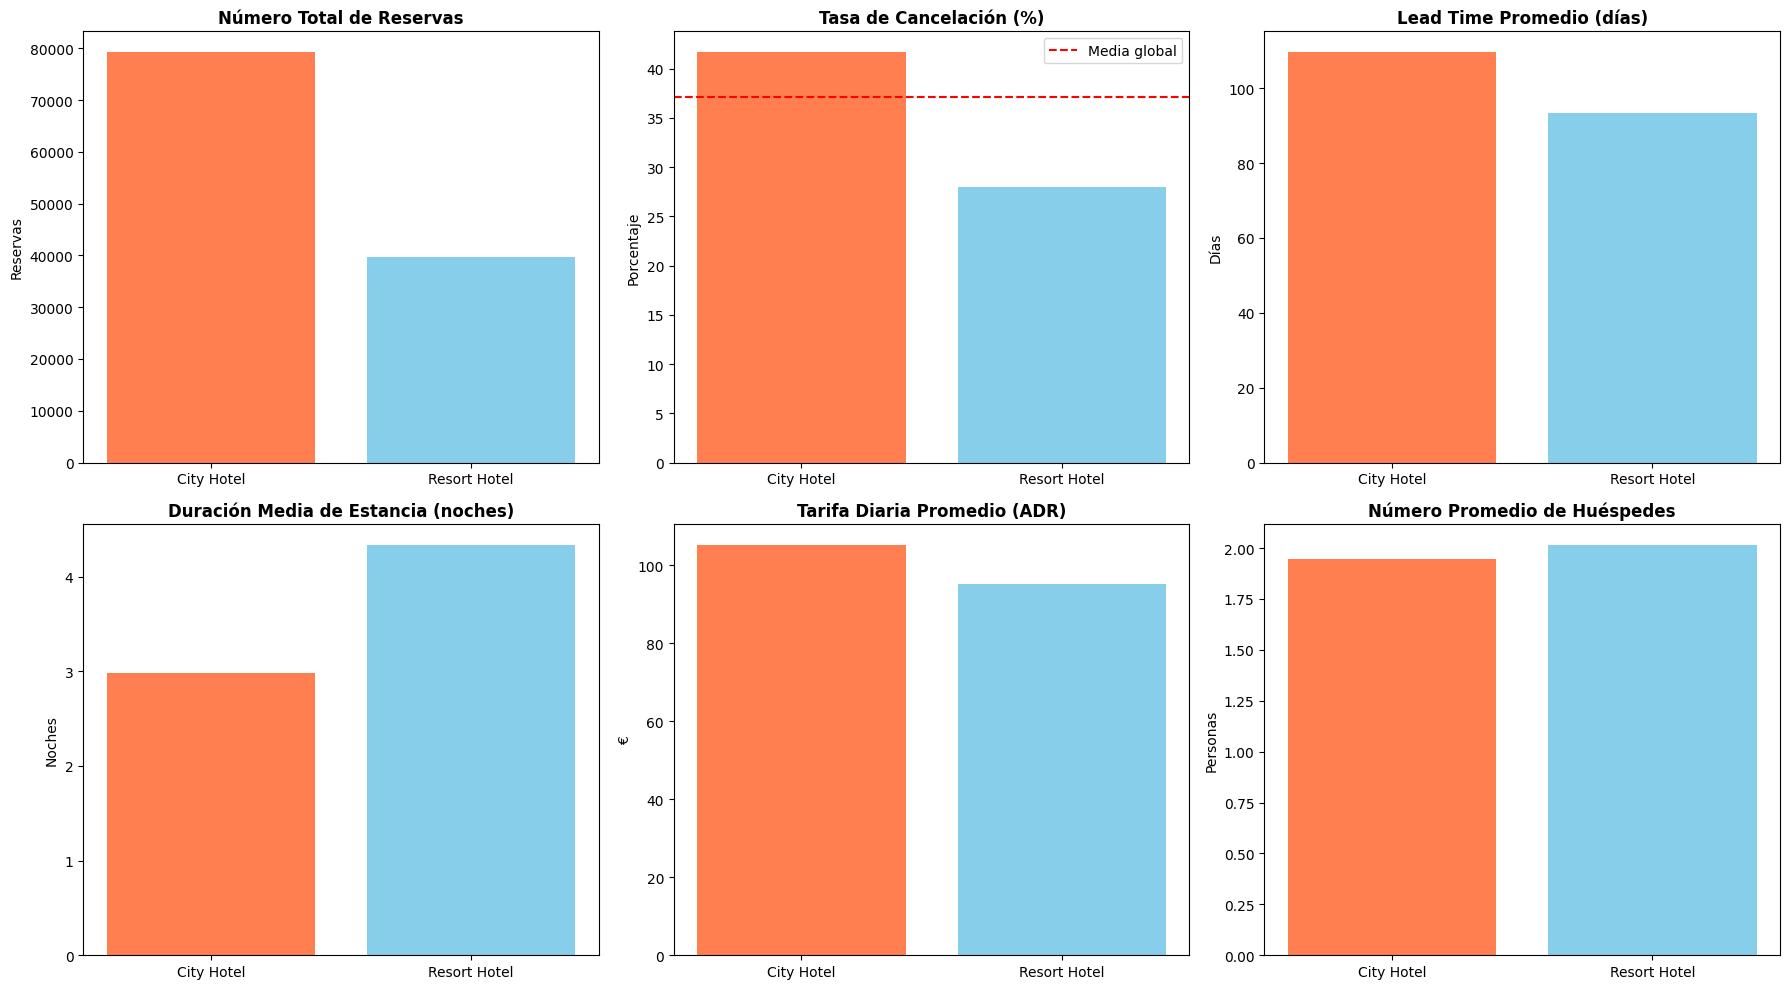


City Hotel:
  - Reservas: 79306
  - Tasa cancelación: 41.71%
  - Lead time medio: 109.73 días
  - Estancia media: 2.98 noches
  - ADR medio: 105.32€

Resort Hotel:
  - Reservas: 39596
  - Tasa cancelación: 27.98%
  - Lead time medio: 93.44 días
  - Estancia media: 4.34 noches
  - ADR medio: 95.35€


In [77]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

hotel_counts = df['hotel'].value_counts()
axes[0, 0].bar(hotel_counts.index, hotel_counts.values, color=['coral', 'skyblue'])
axes[0, 0].set_title('Número Total de Reservas', fontweight='bold')
axes[0, 0].set_ylabel('Reservas')

cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
axes[0, 1].bar(cancel_by_hotel.index, cancel_by_hotel.values, color=['coral', 'skyblue'])
axes[0, 1].set_title('Tasa de Cancelación (%)', fontweight='bold')
axes[0, 1].set_ylabel('Porcentaje')
axes[0, 1].axhline(y=df['is_canceled'].mean()*100, color='red', linestyle='--', label='Media global')
axes[0, 1].legend()

leadtime_by_hotel = df.groupby('hotel')['lead_time'].mean()
axes[0, 2].bar(leadtime_by_hotel.index, leadtime_by_hotel.values, color=['coral', 'skyblue'])
axes[0, 2].set_title('Lead Time Promedio (días)', fontweight='bold')
axes[0, 2].set_ylabel('Días')

nights_by_hotel = df.groupby('hotel')['total_nights'].mean()
axes[1, 0].bar(nights_by_hotel.index, nights_by_hotel.values, color=['coral', 'skyblue'])
axes[1, 0].set_title('Duración Media de Estancia (noches)', fontweight='bold')
axes[1, 0].set_ylabel('Noches')

adr_by_hotel = df.groupby('hotel')['adr'].mean()
axes[1, 1].bar(adr_by_hotel.index, adr_by_hotel.values, color=['coral', 'skyblue'])
axes[1, 1].set_title('Tarifa Diaria Promedio (ADR)', fontweight='bold')
axes[1, 1].set_ylabel('€')

guests_by_hotel = df.groupby('hotel')['total_guests'].mean()
axes[1, 2].bar(guests_by_hotel.index, guests_by_hotel.values, color=['coral', 'skyblue'])
axes[1, 2].set_title('Número Promedio de Huéspedes', fontweight='bold')
axes[1, 2].set_ylabel('Personas')

plt.tight_layout()
plt.show()

print(f"\nCity Hotel:")
print(f"  - Reservas: {hotel_counts['City Hotel']}")
print(f"  - Tasa cancelación: {cancel_by_hotel['City Hotel']:.2f}%")
print(f"  - Lead time medio: {leadtime_by_hotel['City Hotel']:.2f} días")
print(f"  - Estancia media: {nights_by_hotel['City Hotel']:.2f} noches")
print(f"  - ADR medio: {adr_by_hotel['City Hotel']:.2f}€")

print(f"\nResort Hotel:")
print(f"  - Reservas: {hotel_counts['Resort Hotel']}")
print(f"  - Tasa cancelación: {cancel_by_hotel['Resort Hotel']:.2f}%")
print(f"  - Lead time medio: {leadtime_by_hotel['Resort Hotel']:.2f} días")
print(f"  - Estancia media: {nights_by_hotel['Resort Hotel']:.2f} noches")
print(f"  - ADR medio: {adr_by_hotel['Resort Hotel']:.2f}€")

### 5.2. Relación entre lead time y cancelación

Uno de los hallazgos más interesantes es la relación entre el tiempo de antelación de la reserva y la probabilidad de cancelación.

C:\Users\danih\AppData\Local\Temp\ipykernel_24668\2967099114.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_by_leadtime = df.groupby('lead_time_category')['is_canceled'].agg(['mean', 'count'])


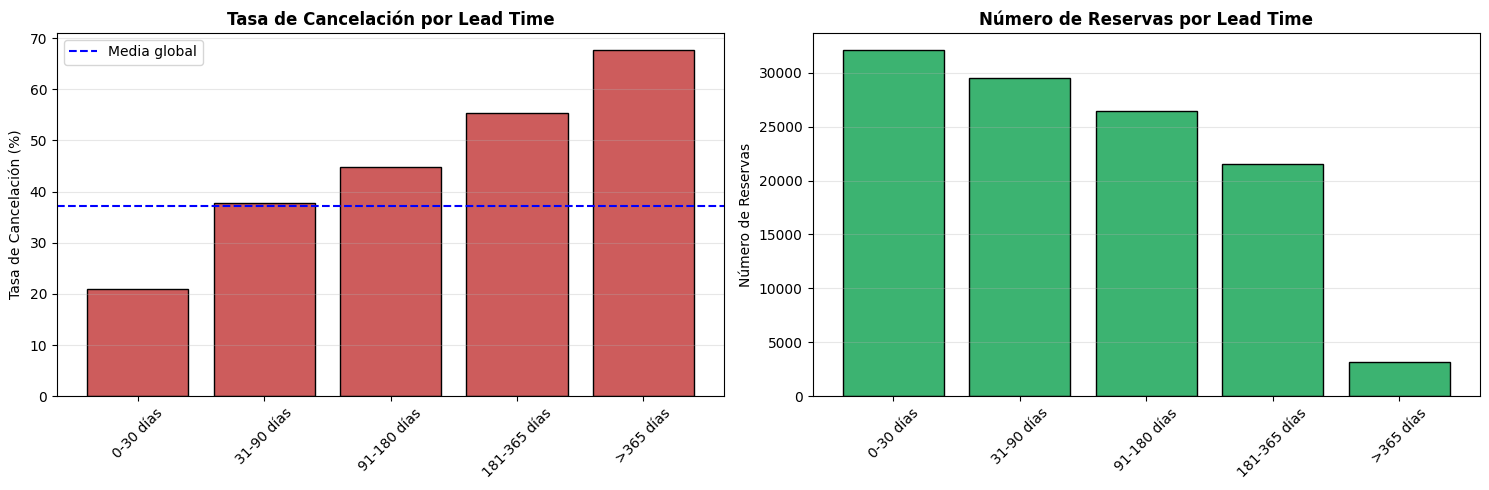

Tasa de cancelación por categoría de lead time:
                         mean  count
lead_time_category                  
0-30 días           20.997694  32094
31-90 días          37.715138  29516
91-180 días         44.750691  26413
181-365 días        55.421239  21508
>365 días           67.662008   3148


In [78]:
df['lead_time_category'] = pd.cut(df['lead_time'], 
                                   bins=[0, 30, 90, 180, 365, 1000],
                                   labels=['0-30 días', '31-90 días', '91-180 días', 
                                          '181-365 días', '>365 días'])

cancel_by_leadtime = df.groupby('lead_time_category')['is_canceled'].agg(['mean', 'count'])
cancel_by_leadtime['mean'] = cancel_by_leadtime['mean'] * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(len(cancel_by_leadtime)), cancel_by_leadtime['mean'], 
           color='indianred', edgecolor='black')
axes[0].set_xticks(range(len(cancel_by_leadtime)))
axes[0].set_xticklabels(cancel_by_leadtime.index, rotation=45)
axes[0].set_title('Tasa de Cancelación por Lead Time', fontweight='bold')
axes[0].set_ylabel('Tasa de Cancelación (%)')
axes[0].axhline(y=df['is_canceled'].mean()*100, color='blue', linestyle='--', 
               label='Media global')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(range(len(cancel_by_leadtime)), cancel_by_leadtime['count'], 
           color='mediumseagreen', edgecolor='black')
axes[1].set_xticks(range(len(cancel_by_leadtime)))
axes[1].set_xticklabels(cancel_by_leadtime.index, rotation=45)
axes[1].set_title('Número de Reservas por Lead Time', fontweight='bold')
axes[1].set_ylabel('Número de Reservas')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Tasa de cancelación por categoría de lead time:")
print(cancel_by_leadtime)

### 5.3. Análisis de estacionalidad

Veamos como se distribuyen las reservas a lo largo de los meses y si hay diferencias entre los tipos de hotel.

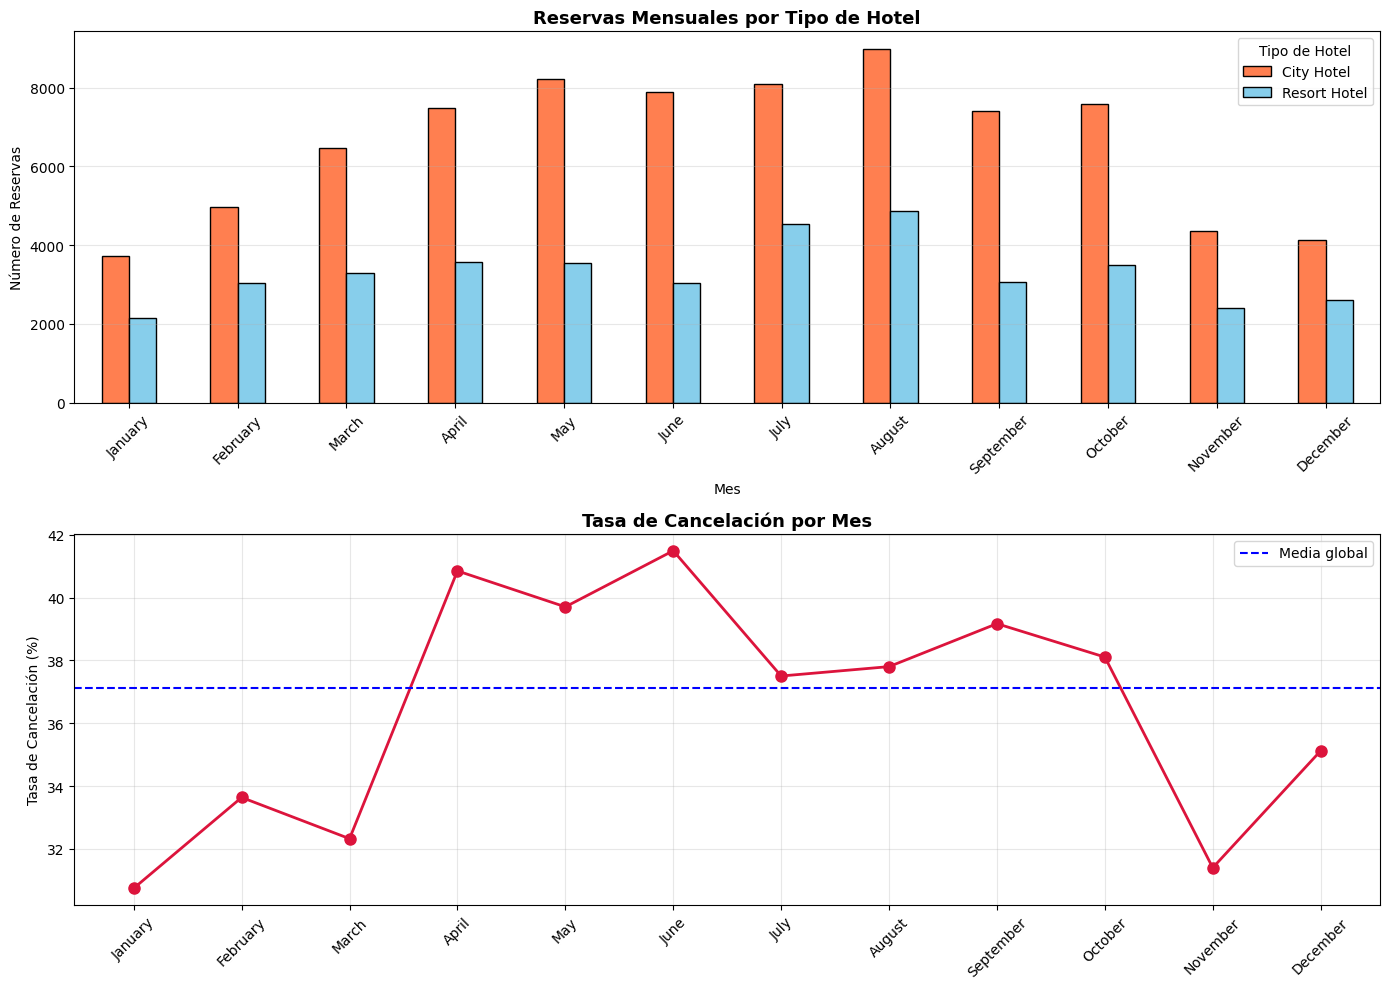

Mes con más reservas: August
Mes con menos reservas: January

Mes con mayor tasa de cancelación: June (41.49%)
Mes con menor tasa de cancelación: January (30.75%)


In [79]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

reservas_mes_hotel = df.groupby(['arrival_date_month', 'hotel']).size().unstack(fill_value=0)
reservas_mes_hotel = reservas_mes_hotel.reindex(month_order)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

reservas_mes_hotel.plot(kind='bar', ax=axes[0], color=['coral', 'skyblue'], edgecolor='black')
axes[0].set_title('Reservas Mensuales por Tipo de Hotel', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Número de Reservas')
axes[0].legend(title='Tipo de Hotel')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

cancel_mes = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
cancel_mes = cancel_mes.reindex(month_order)

axes[1].plot(range(len(cancel_mes)), cancel_mes.values, marker='o', 
            linewidth=2, markersize=8, color='crimson')
axes[1].set_xticks(range(len(cancel_mes)))
axes[1].set_xticklabels(cancel_mes.index, rotation=45)
axes[1].set_title('Tasa de Cancelación por Mes', fontweight='bold', fontsize=13)
axes[1].set_ylabel('Tasa de Cancelación (%)')
axes[1].axhline(y=df['is_canceled'].mean()*100, color='blue', linestyle='--', 
               label='Media global', linewidth=1.5)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Mes con más reservas:", reservas_mes_hotel.sum(axis=1).idxmax())
print("Mes con menos reservas:", reservas_mes_hotel.sum(axis=1).idxmin())
print(f"\nMes con mayor tasa de cancelación: {cancel_mes.idxmax()} ({cancel_mes.max():.2f}%)")
print(f"Mes con menor tasa de cancelación: {cancel_mes.idxmin()} ({cancel_mes.min():.2f}%)")

### 5.4. Perfil del cliente repetidor vs nuevo

Vamos a comparar el comportamiento entre clientes que repiten y clientes nuevos.

Clientes nuevos: 115096 (96.80%)
Clientes repetidores: 3806 (3.20%)

--- CLIENTES NUEVOS ---
Tasa de cancelación: 37.89%
Lead time medio: 106.74 días
Estancia media: 3.48 noches
ADR medio: 103.24€
Solicitudes especiales promedio: 0.57

--- CLIENTES REPETIDORES ---
Tasa de cancelación: 14.50%
Lead time medio: 30.77 días
Estancia media: 1.93 noches
ADR medio: 64.42€
Solicitudes especiales promedio: 0.63


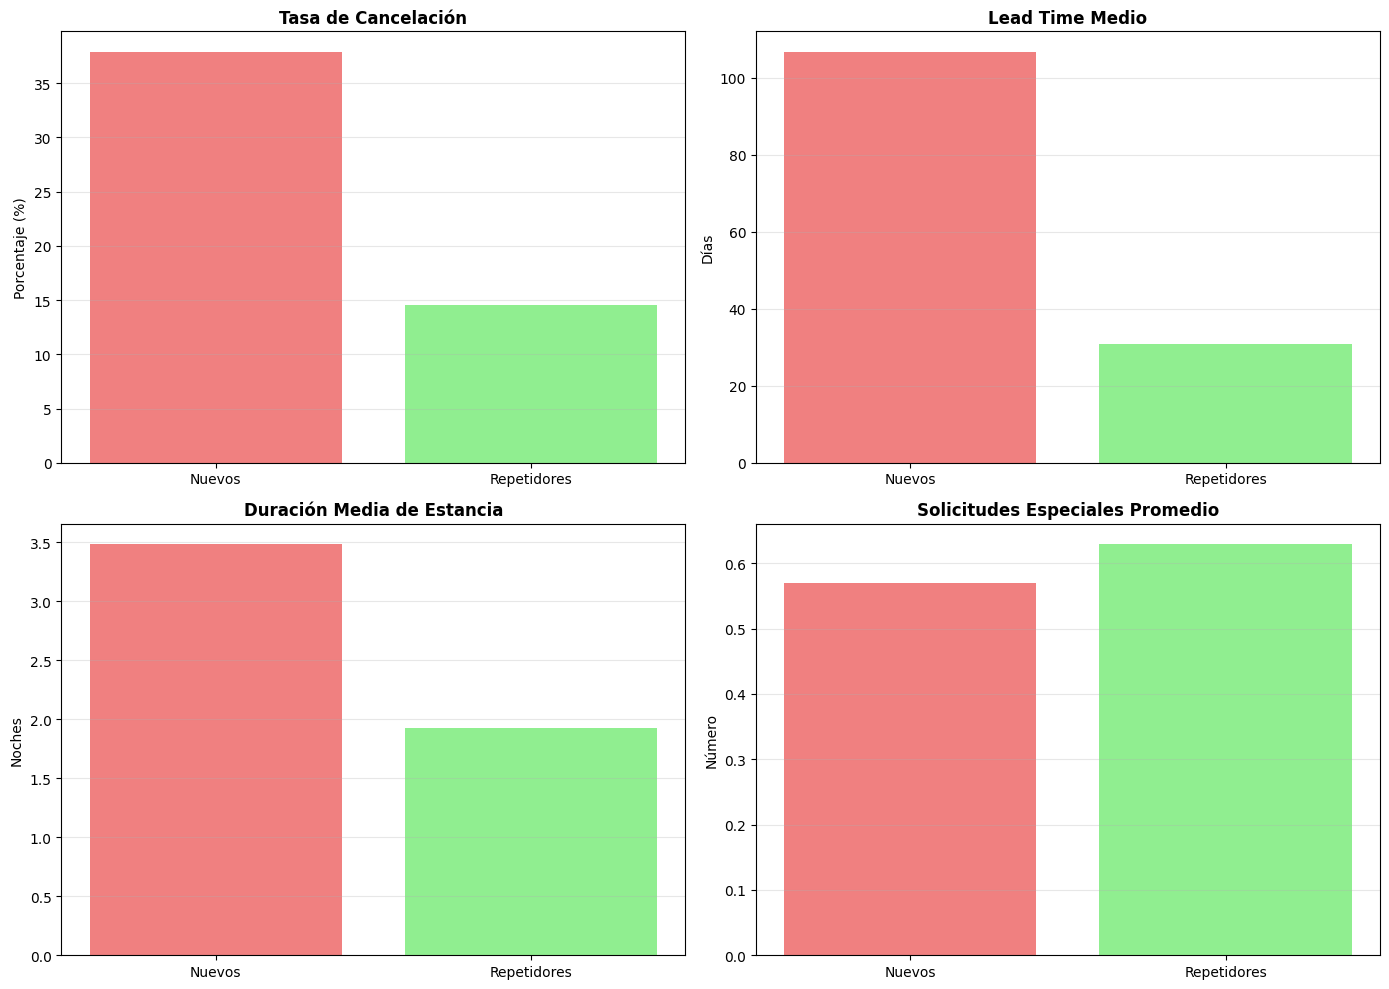

In [80]:
nuevos = df[df['is_repeated_guest'] == 0]
repetidores = df[df['is_repeated_guest'] == 1]

print(f"Clientes nuevos: {len(nuevos)} ({len(nuevos)/len(df)*100:.2f}%)")
print(f"Clientes repetidores: {len(repetidores)} ({len(repetidores)/len(df)*100:.2f}%)")

print("\n--- CLIENTES NUEVOS ---")
print(f"Tasa de cancelación: {nuevos['is_canceled'].mean()*100:.2f}%")
print(f"Lead time medio: {nuevos['lead_time'].mean():.2f} días")
print(f"Estancia media: {nuevos['total_nights'].mean():.2f} noches")
print(f"ADR medio: {nuevos['adr'].mean():.2f}€")
print(f"Solicitudes especiales promedio: {nuevos['total_of_special_requests'].mean():.2f}")

print("\n--- CLIENTES REPETIDORES ---")
print(f"Tasa de cancelación: {repetidores['is_canceled'].mean()*100:.2f}%")
print(f"Lead time medio: {repetidores['lead_time'].mean():.2f} días")
print(f"Estancia media: {repetidores['total_nights'].mean():.2f} noches")
print(f"ADR medio: {repetidores['adr'].mean():.2f}€")
print(f"Solicitudes especiales promedio: {repetidores['total_of_special_requests'].mean():.2f}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Tasa de cancelación
labels = ['Nuevos', 'Repetidores']
cancel_rates = [nuevos['is_canceled'].mean()*100, repetidores['is_canceled'].mean()*100]
axes[0, 0].bar(labels, cancel_rates, color=['lightcoral', 'lightgreen'])
axes[0, 0].set_title('Tasa de Cancelación', fontweight='bold')
axes[0, 0].set_ylabel('Porcentaje (%)')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Lead time
lead_times = [nuevos['lead_time'].mean(), repetidores['lead_time'].mean()]
axes[0, 1].bar(labels, lead_times, color=['lightcoral', 'lightgreen'])
axes[0, 1].set_title('Lead Time Medio', fontweight='bold')
axes[0, 1].set_ylabel('Días')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Duración de estancia
nights = [nuevos['total_nights'].mean(), repetidores['total_nights'].mean()]
axes[1, 0].bar(labels, nights, color=['lightcoral', 'lightgreen'])
axes[1, 0].set_title('Duración Media de Estancia', fontweight='bold')
axes[1, 0].set_ylabel('Noches')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Solicitudes especiales
special_req = [nuevos['total_of_special_requests'].mean(), 
               repetidores['total_of_special_requests'].mean()]
axes[1, 1].bar(labels, special_req, color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Solicitudes Especiales Promedio', fontweight='bold')
axes[1, 1].set_ylabel('Número')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Conclusiones

Después de analizar los datos de reservas hoteleras, podemos extraer varias conclusiones interesantes sobre el comportamiento de los clientes y los factores que influyen en las cancelaciones.

### 6.1. Factores clave relacionados con las cancelaciones

**1. Tipo de depósito:** Este es el factor más determinante. Las reservas con depósito no reembolsable tienen una tasa de cancelación muchísimo más alta que las que tienen depósito reembolsable o sin depósito. Esto es un poco contradictorio porque uno pensaría que si ya has pagado no vas a cancelar, pero los datos muestran lo contrario. Puede ser que estas reservas se hagan con mucha antelación o en condiciones especiales.

**2. Lead time (tiempo de antelación):** Hay una relación clara: cuanto más tiempo pasa entre la reserva y la llegada, mayor es la probabilidad de cancelación. Las reservas hechas con más de 6 meses de antelación tienen tasas de cancelación muy superiores a la media. Esto tiene sentido porque en tanto tiempo pueden cambiar muchas cosas en los planes de las personas.

**3. Canal de distribución:** Las reservas que vienen de agencias de viajes (TA/TO) y grupos tienen más cancelaciones que las directas o corporativas. Las reservas corporativas son las más fiables.

**4. Tipo de hotel:** El City Hotel tiene mayor tasa de cancelación (aprox. 42%) que el Resort Hotel (aprox. 28%). Esto puede deberse a que los viajes a ciudad son más flexibles o de negocios, mientras que los resort suelen ser vacaciones más planificadas.

### 6.2. Patrones temporales

La demanda hotelera muestra un patrón estacional muy marcado:
- **Temporada alta:** Julio y agosto son los meses con más reservas, típico del turismo de verano
- **Temporada baja:** Enero es el mes con menos actividad
- La tasa de cancelación también varía por meses, siendo mayor en los meses de primavera

Interesante ver que 2016 fue el año con más reservas pero luego en 2017 bajó, no sabemos si es porque el dataset está incompleto o si realmente hubo una bajada en el negocio.

### 6.3. Perfil de los clientes

**Duración de estancia:** La mayoría de reservas son para estancias cortas (1-3 noches), lo que indica que el negocio se basa más en la rotación que en estancias largas.

**Clientes repetidores vs nuevos:**
- Solo un pequeño porcentaje son clientes repetidores (3-4%)
- Los repetidores cancelan MUCHO menos (14% vs 38%)
- Los repetidores hacen más solicitudes especiales, lo que indica mayor compromiso
- Esto sugiere que fidelizar clientes es muy importante para reducir cancelaciones

**Países de origen:** Portugal es el país con más reservas (de lejos), seguido de Reino Unido, Francia y España. Esto probablemente se debe a la ubicación de los hoteles.

### 6.4. Características operativas

**ADR (Average Daily Rate):** La tarifa media es de unos 102€, pero hay mucha variabilidad. El City Hotel tiene tarifas ligeramente superiores al Resort Hotel.

**Solicitudes especiales:** Existe una correlación negativa con las cancelaciones - los clientes que piden cosas especiales (parking, tipo de habitación, etc.) cancelan menos. Esto puede indicar mayor compromiso con la reserva.


### 6.5. Conclusión final

El análisis revela que las cancelaciones en hoteles son un fenómeno complejo influenciado por múltiples factores. Los más relevantes son el tipo de depósito, el tiempo de antelación de la reserva, el canal de distribución y el tipo de cliente. 

La buena noticia es que hay patrones claros que se pueden usar para mejorar la gestión. Por ejemplo, sabiendo que las reservas con mucho lead time cancelan más, se podrían implementar recordatorios o incentivos para confirmar la reserva cuando se acerca la fecha. O enfocar esfuerzos de retención en convertir clientes nuevos en repetidores, ya que estos últimos son mucho más fiables.

En definitiva, entender estos datos puede ayudar a los hoteles a optimizar su ocupación, reducir el impacto de las cancelaciones y mejorar sus ingresos.